In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

D:\university\term6\housh mohasebati\project1\mlp-on-mnist\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
469/469 - 7s - 14ms/step - accuracy: 0.8240 - loss: 0.5959 - val_accuracy: 0.9461 - val_loss: 0.1795
Epoch 2/40
469/469 - 6s - 12ms/step - accuracy: 0.9173 - loss: 0.2798 - val_accuracy: 0.9615 - val_loss: 0.1303
Epoch 3/40
469/469 - 6s - 13ms/step - accuracy: 0.9362 - loss: 0.2098 - val_accuracy: 0.9685 - val_loss: 0.1025
Epoch 4/40
469/469 - 6s - 12ms/step - accuracy: 0.9486 - loss: 0.1663 - val_accuracy: 0.9725 - val_loss: 0.0924
Epoch 5/40
469/469 - 6s - 12ms/step - accuracy: 0.9560 - loss: 0.1436 - val_accuracy: 0.9760 - val_loss: 0.0816
Epoch 6/40
469/469 - 6s - 12ms/step - accuracy: 0.9614 - loss: 0.1241 - val_accuracy: 0.9776 - val_loss: 0.0748
Epoch 7/40
469/469 - 6s - 13ms/step - accuracy: 0.9669 - loss: 0.1066 - val_accuracy: 0.9794 - val_loss: 0.0714
Epoch 8/40
469/469 - 6s - 12ms/step - accuracy: 0.9701 - loss: 0.0950 - val_accuracy: 0.9785 - val_loss: 0.0689
Epoch 9/40
469/469 - 5s - 11ms/step - accuracy: 0.9724 - loss: 0.0867 - val_accuracy: 0.9797 - val_loss:

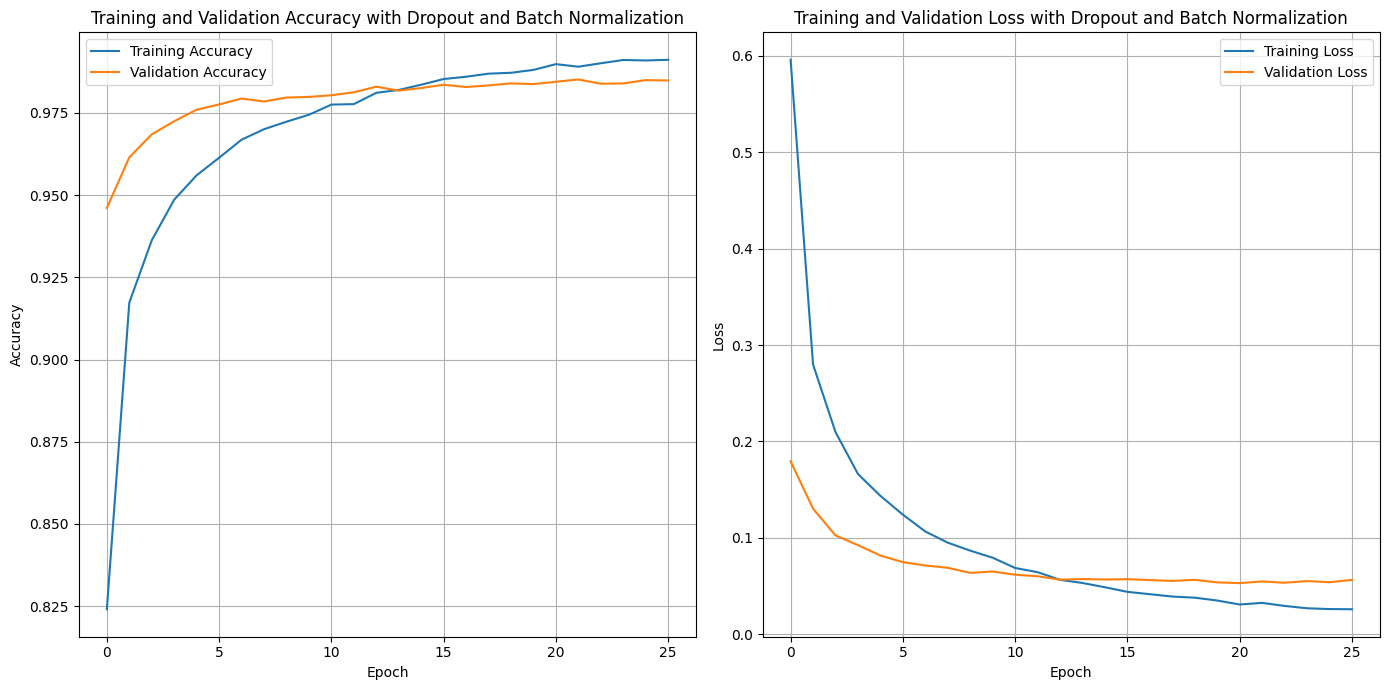

In [3]:
#batch normalization 

# Define the model with Dropout and Batch Normalization
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(Dropout(0.5))  # Add Dropout with rate 0.5
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(Dropout(0.5))  # Add Dropout with rate 0.5
    
    model.add(Dense(10, activation='softmax'))
    return model

# Hyperparameters
learning_rate = 0.0001
epochs = 40
batch_size = 128
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create the model
model = create_model()
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping], verbose=2)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Dropout and Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Dropout and Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
